In [1]:
from DataBoardGame.gamelearning import GameFarm
from DataBoardGame.utils import set_log
import pandas as pd
import logging
set_log(logging.ERROR)


In [4]:
gf = GameFarm(number_of_players_per_game=4, parallel=2)    
for i in range(100):
    gf.learn()

In [5]:
res = []

for state, actions in gf.merge_q_tables().items():
    for action, value in actions.items():
        if value!=0:
            row = state.to_dict()
            row.update(action.to_dict())
            row['target'] = value
            res.append(row)
        
df = pd.json_normalize(res)
df

,state_value,action_type,target,card_flags.7118443623807982907_open,card_flags.7118443623807982907_trash,card_flags.-1215162803371835517_open,card_flags.-1215162803371835517_trash,card_flags.-6158084010650084885_open,card_flags.-6158084010650084885_trash,card_flags.6418469356891395815_open,...,employees.4018047013654928829_3,employees.4605649885283303336_2,employees.-5414419696611646189_3,employees.6621078243026924551_3,employees.-6158084010650084885_2,employees.4838473271286179829_1,employees.651515668024666528_2,employees.4781468352281946116_3,employees.-6064219501578660517_1,employees.-2415592689870209839_3
0,1150.0,GenerateRsourceAction,718.228350,False,True,True,True,True,False,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1155.0,HireEmployeeAction,113.570321,False,True,True,True,True,False,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1155.0,HireEmployeeAction,113.570321,False,True,True,True,True,False,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1156.0,FireEmployeeAction,1042.572584,False,True,False,True,True,False,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1255.0,EmptyAction,163.740374,False,True,False,True,False,True,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725492,6496.0,GenerateRsourceAction,4.253177,True,True,False,True,False,True,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
725493,6501.0,HireEmployeeAction,0.850635,True,True,False,True,False,True,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
725494,6502.0,FireEmployeeAction,-1.701271,True,True,False,True,True,True,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
725495,6500.0,GenerateRsourceAction,4.253177,False,True,False,True,True,True,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
from matplotlib import pyplot as plt
from sklearn import datasets,tree
from sklearn.tree import DecisionTreeRegressor ,DecisionTreeClassifier
from sklearn import preprocessing




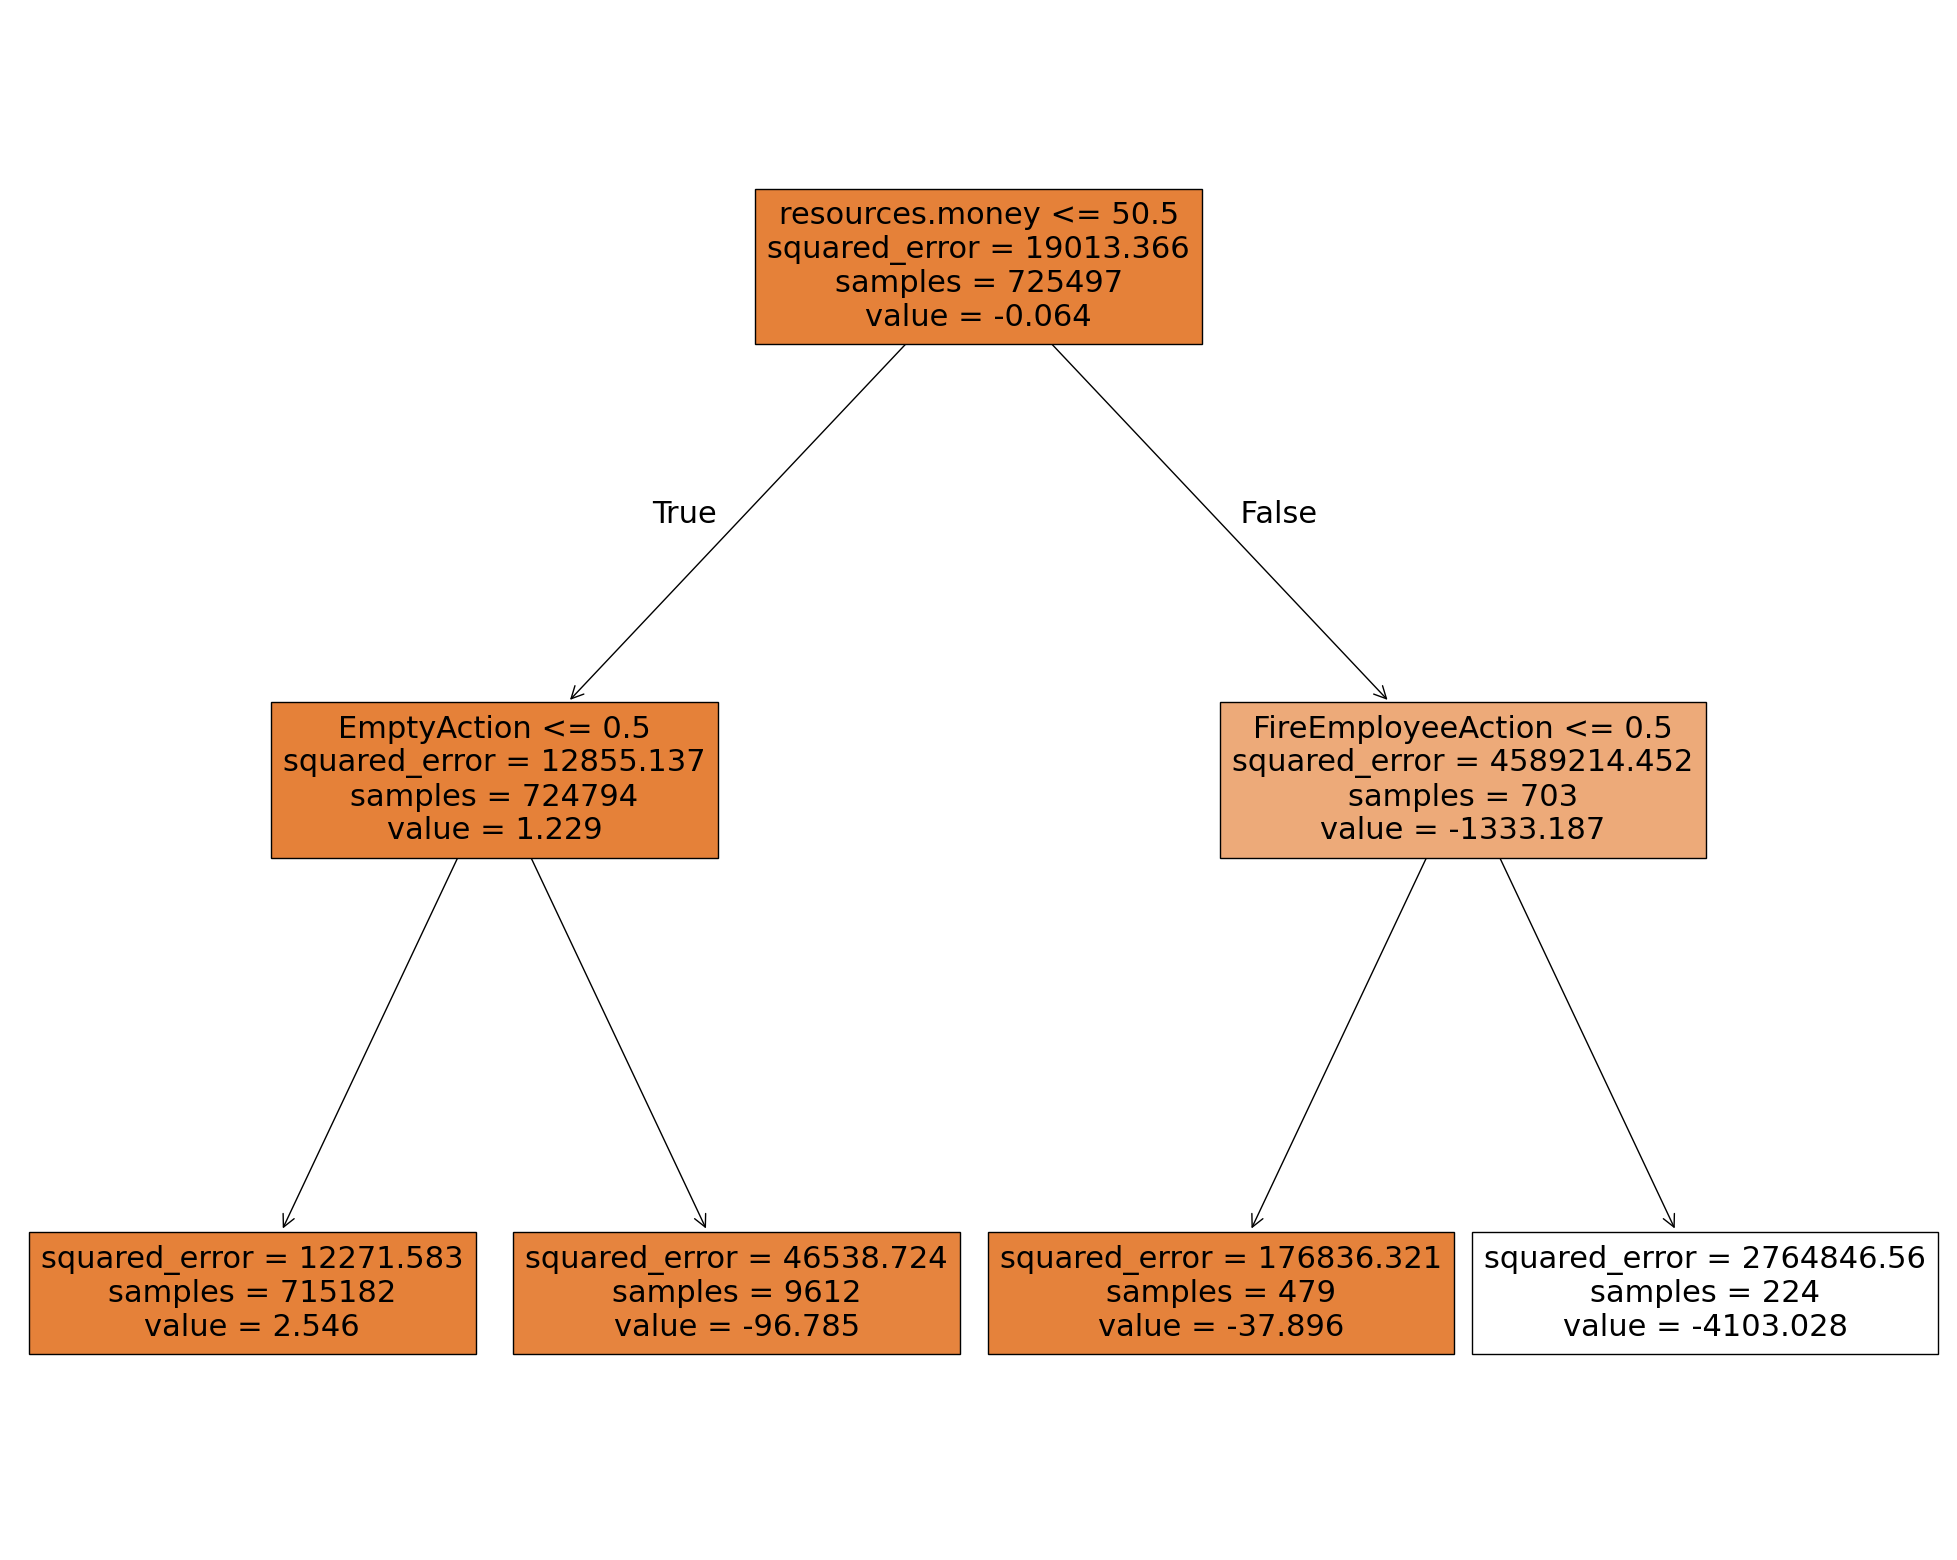

In [11]:

# getting all the columns
my_cols = set(df.columns)
 
# removing the desired column
my_cols.remove('target') 

my_cols.remove('state_value') 
my_cols = list(my_cols)

# Prepare the data data
X = df[my_cols]
dummy = pd.get_dummies(df['action_type'], dtype=bool)
X = pd.concat([X, dummy], axis=1).drop('action_type', axis=1)


Y = df[['target']]

#Y = df[['target']]
# Fit the classifier with default hyper-parameters
clf = DecisionTreeRegressor(random_state=1234, max_depth=2)
model = clf.fit(X, Y)

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names = X.columns,  
                   filled=True)

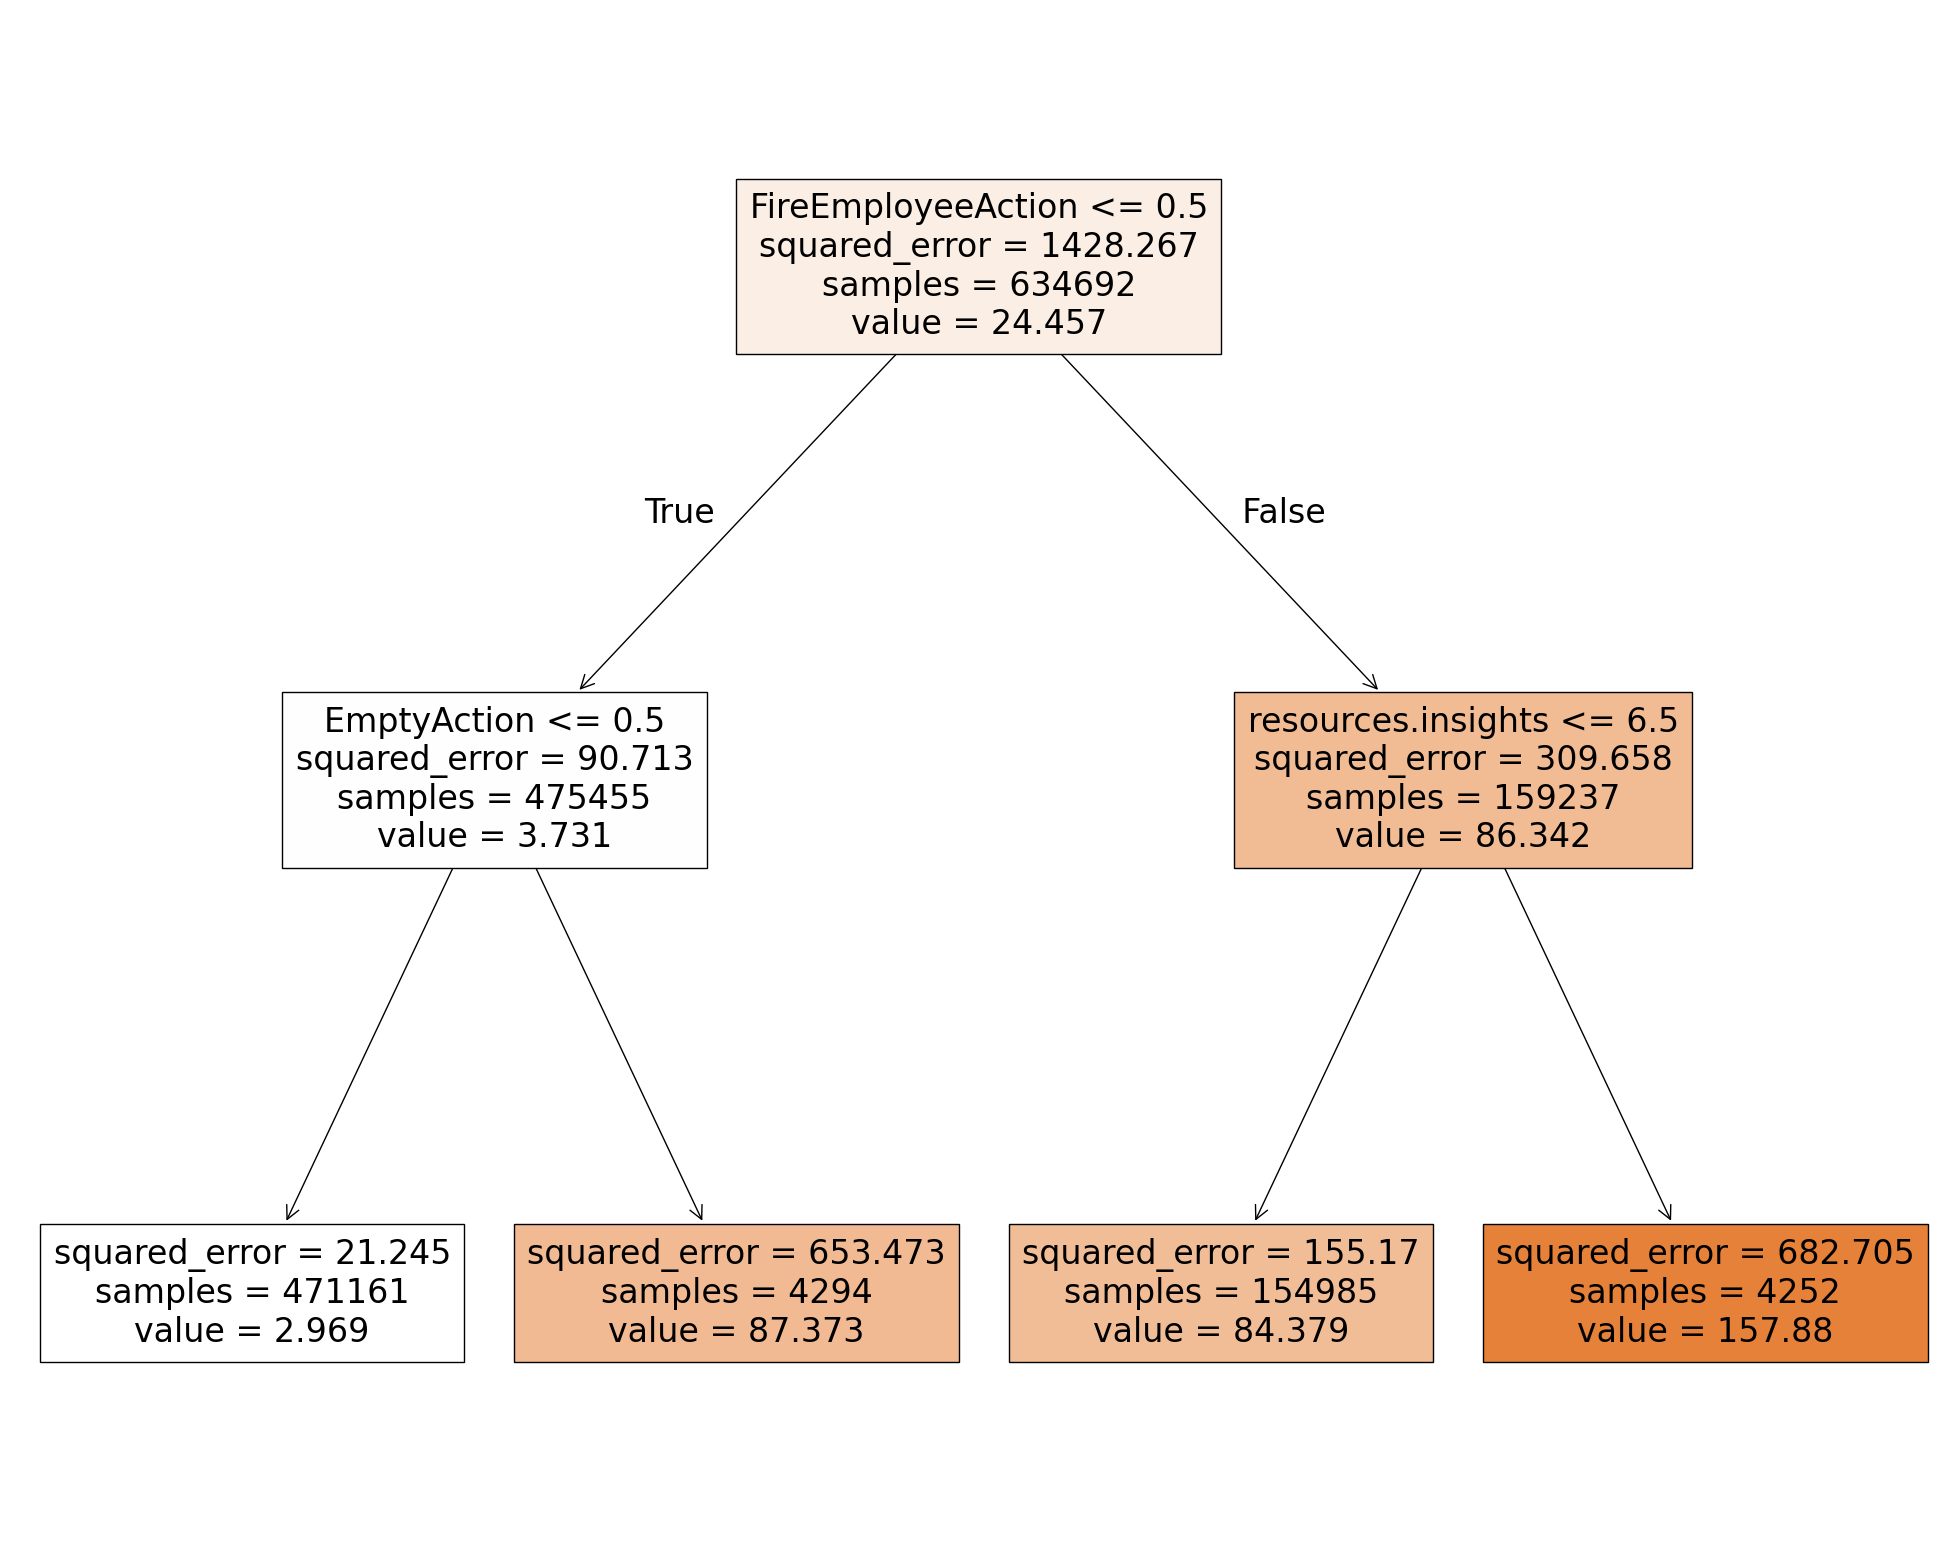

In [9]:

# getting all the columns
my_cols = set(df.columns)
 
# removing the desired column
my_cols.remove('target') 

my_cols.remove('state_value') 
my_cols = list(my_cols)

# Prepare the data data
X = df[my_cols]
dummy = pd.get_dummies(df['action_type'], dtype=bool)
X = pd.concat([X, dummy], axis=1).drop('action_type', axis=1)

X = X[df['target']>0]

Y = df[df['target']>0][['target']]

#Y = df[['target']]
# Fit the classifier with default hyper-parameters
clf = DecisionTreeRegressor(random_state=1234, max_depth=2)
model = clf.fit(X, Y)

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names = X.columns,  
                   filled=True)

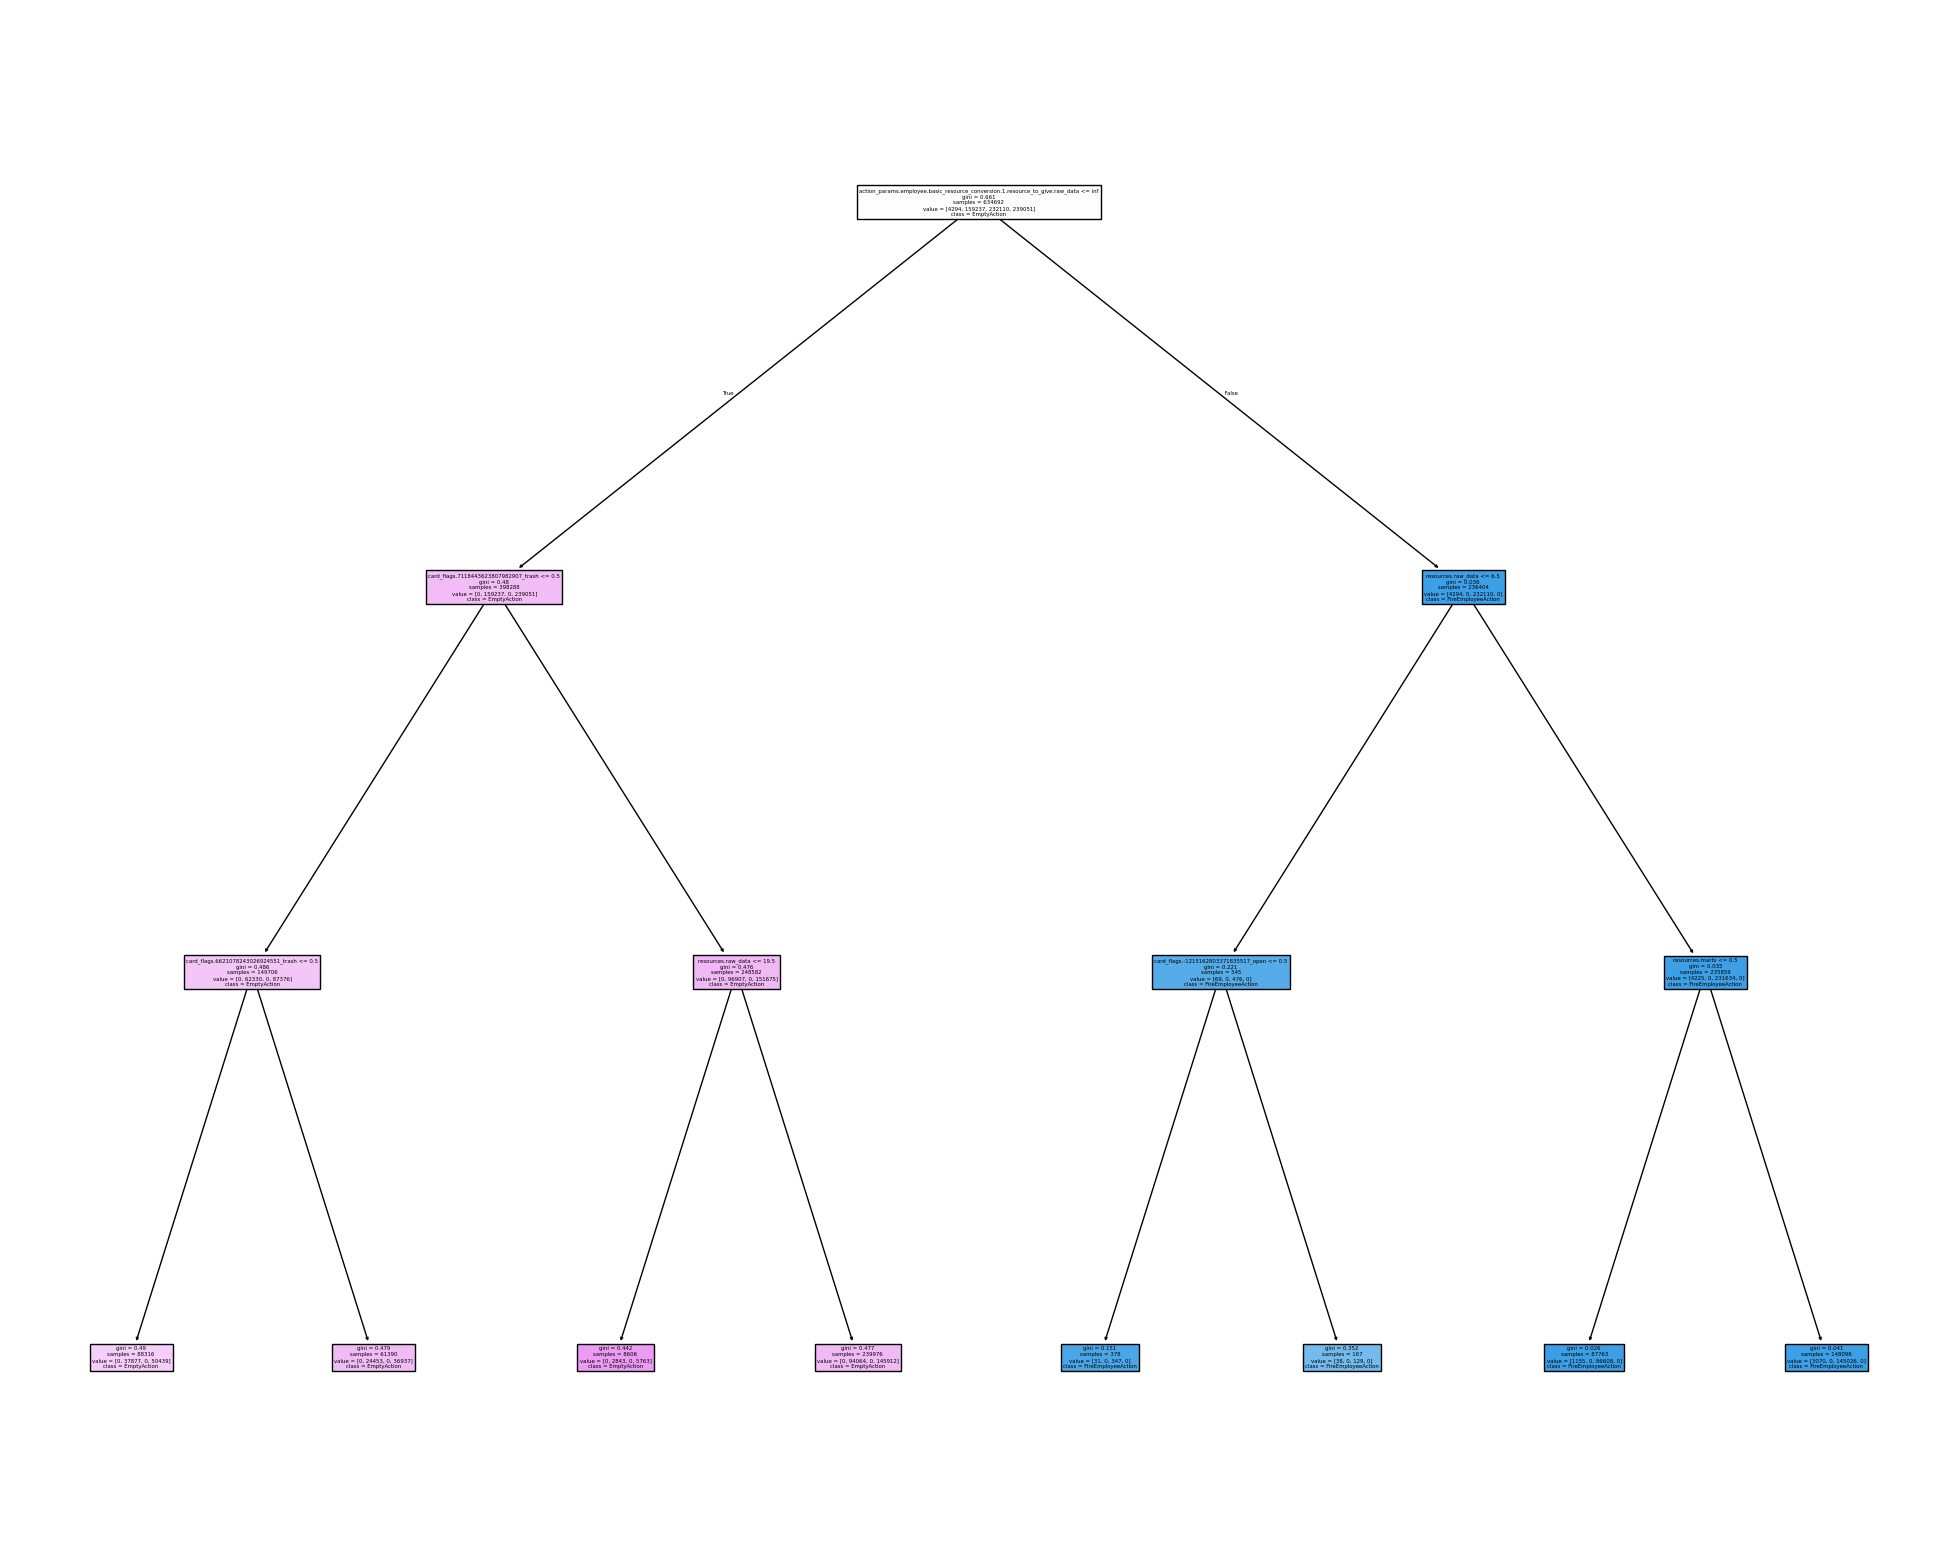

In [10]:

# getting all the columns
my_cols = set(df.columns)
 
# removing the desired column
my_cols.remove('target') 
my_cols.remove('state_value') 
my_cols.remove('action_type')
my_cols = list(my_cols)

# Prepare the data data
X = df[df['target']>0][my_cols]

Y = df[df['target']>0][['action_type']]
# Fit the classifier with default hyper-parameters
clf = DecisionTreeClassifier(random_state=1234, max_depth=3)
model = clf.fit(X, Y)

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names = X.columns,  
                   class_names= Y['action_type'].unique(),
                   filled=True)

In [ ]:
dummy